# Movie Recommender System Project
## IMDB Scraping using OMDB API
>Eve Ben Ezra

The following notebook contains code for scraping IMDB using the OMDBAPI - http://www.omdbapi.com/

The movies I've chosen to scrape are the movies available with data pulled from them from the MovieLens 20M dataset, available here: https://grouplens.org/datasets/movielens/20m/

The movies were scraped based on similar IMDB IDs, in two groups as the MovieLens dataset was missing the leading 'tt0' or 'tt00' of the ID. 

I chose to scrape these particular movies for plot data, as well as other aspects of the movies that are unavailable in the grouplens dataset, such as director, actors, release year, box office, and more. Hopefully this information will help me with my recommender system.

In [ ]:
# https://buildmedia.readthedocs.org/media/pdf/omdbpy/latest/omdbpy.pdf

import omdb
from omdb import OMDBClient
client = OMDBClient(apikey='c5e9f974')

In [2]:
# if using the module level client
omdb.set_default('apikey', 'c5e9f974')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

%matplotlib inline

In [34]:
links = pd.read_csv('/Users/user/movielens-20m-dataset/link.csv')
movie_info = pd.read_csv('/Users/user/movielens-20m-dataset/movie.csv')

In [35]:
movies = pd.merge(links, movie_info, on="movieId")
movies.head()

,movieId,imdbId,tmdbId,title,genres
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy
2,3,113228,15602.0,Grumpier Old Men (1995),Comedy|Romance
3,4,114885,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,113041,11862.0,Father of the Bride Part II (1995),Comedy


In [36]:
# Get the full imbd ID

movies['full_imdbid'] = movies['imdbId'].apply(lambda x: 'tt0' + str(x))

In [37]:
movies.head()

,movieId,imdbId,tmdbId,title,genres,full_imdbid
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,tt0114709
1,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy,tt0113497
2,3,113228,15602.0,Grumpier Old Men (1995),Comedy|Romance,tt0113228
3,4,114885,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance,tt0114885
4,5,113041,11862.0,Father of the Bride Part II (1995),Comedy,tt0113041


In [8]:
movies.shape

(27278, 6)

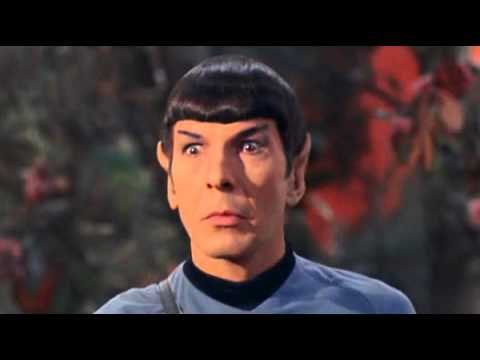

In [10]:
movie = omdb.imdbid('tt0114709', tomatoes=False, timeout=5)
df = pd.DataFrame.from_dict(movie)
    
for Id in movies.full_imdbid:
    movie = omdb.imdbid(Id, tomatoes=False, timeout=5)
    movie_set  = pd.DataFrame(movie, columns=movie.keys())
    df = pd.concat([df, movie_set], axis =0, sort=False)
    
    
#play lenord Nemoy saying "beep" for 4 hours
from IPython.display import YouTubeVideo
YouTubeVideo("BE9b3IdTCiY",autoplay=True)

In [11]:
df

,title,year,rated,released,runtime,genre,director,writer,actors,plot,...,type,dvd,box_office,production,website,response,season,episode,series_id,total_seasons
0,Toy Story,1995,G,22 Nov 1995,81 min,"Animation, Adventure, Comedy, Family, Fantasy",John Lasseter,"John Lasseter (original story by), Pete Docter...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney",A cowboy doll is profoundly threatened and jea...,...,movie,20 Mar 2001,N/A,Buena Vista,http://www.disney.com/ToyStory,True,NaN,NaN,NaN,NaN
1,Toy Story,1995,G,22 Nov 1995,81 min,"Animation, Adventure, Comedy, Family, Fantasy",John Lasseter,"John Lasseter (original story by), Pete Docter...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney",A cowboy doll is profoundly threatened and jea...,...,movie,20 Mar 2001,N/A,Buena Vista,http://www.disney.com/ToyStory,True,NaN,NaN,NaN,NaN
2,Toy Story,1995,G,22 Nov 1995,81 min,"Animation, Adventure, Comedy, Family, Fantasy",John Lasseter,"John Lasseter (original story by), Pete Docter...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney",A cowboy doll is profoundly threatened and jea...,...,movie,20 Mar 2001,N/A,Buena Vista,http://www.disney.com/ToyStory,True,NaN,NaN,NaN,NaN
0,Toy Story,1995,G,22 Nov 1995,81 min,"Animation, Adventure, Comedy, Family, Fantasy",John Lasseter,"John Lasseter (original story by), Pete Docter...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney",A cowboy doll is profoundly threatened and jea...,...,movie,20 Mar 2001,N/A,Buena Vista,http://www.disney.com/ToyStory,True,NaN,NaN,NaN,NaN
1,Toy Story,1995,G,22 Nov 1995,81 min,"Animation, Adventure, Comedy, Family, Fantasy",John Lasseter,"John Lasseter (original story by), Pete Docter...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney",A cowboy doll is profoundly threatened and jea...,...,movie,20 Mar 2001,N/A,Buena Vista,http://www.disney.com/ToyStory,True,NaN,NaN,NaN,NaN
2,Toy Story,1995,G,22 Nov 1995,81 min,"Animation, Adventure, Comedy, Family, Fantasy",John Lasseter,"John Lasseter (original story by), Pete Docter...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney",A cowboy doll is profoundly threatened and jea...,...,movie,20 Mar 2001,N/A,Buena Vista,http://www.disney.com/ToyStory,True,NaN,NaN,NaN,NaN
0,Jumanji,1995,PG,15 Dec 1995,104 min,"Adventure, Comedy, Family, Fantasy",Joe Johnston,"Jonathan Hensleigh (screenplay by), Greg Taylo...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",When two kids find and play a magical board ga...,...,movie,25 Jan 2000,N/A,Sony Pictures Home Entertainment,N/A,True,NaN,NaN,NaN,NaN
1,Jumanji,1995,PG,15 Dec 1995,104 min,"Adventure, Comedy, Family, Fantasy",Joe Johnston,"Jonathan Hensleigh (screenplay by), Greg Taylo...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",When two kids find and play a magical board ga...,...,movie,25 Jan 2000,N/A,Sony Pictures Home Entertainment,N/A,True,NaN,NaN,NaN,NaN
2,Jumanji,1995,PG,15 Dec 1995,104 min,"Adventure, Comedy, Family, Fantasy",Joe Johnston,"Jonathan Hensleigh (screenplay by), Greg Taylo...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",When two kids find and play a magical board ga...,...,movie,25 Jan 2000,N/A,Sony Pictures Home Entertainment,N/A,True,NaN,NaN,NaN,NaN
0,Grumpier Old Men,1995,PG-13,22 Dec 1995,101 min,"Comedy, Romance",Howard Deutch,"Mark Steven Johnson (characters), Mark Steven ...","Walter Matthau, Jack Lemmon, Sophia Loren, Ann...",John and Max resolve to save their beloved bai...,...,movie,18 Nov 1997,N/A,Warner Home Video,N/A,True,NaN,NaN,NaN,NaN


In [12]:
df.shape

(35976, 29)

In [13]:
df = df.drop_duplicates(subset='title')

In [14]:
df

,title,year,rated,released,runtime,genre,director,writer,actors,plot,...,type,dvd,box_office,production,website,response,season,episode,series_id,total_seasons
0,Toy Story,1995,G,22 Nov 1995,81 min,"Animation, Adventure, Comedy, Family, Fantasy",John Lasseter,"John Lasseter (original story by), Pete Docter...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney",A cowboy doll is profoundly threatened and jea...,...,movie,20 Mar 2001,N/A,Buena Vista,http://www.disney.com/ToyStory,True,NaN,NaN,NaN,NaN
0,Jumanji,1995,PG,15 Dec 1995,104 min,"Adventure, Comedy, Family, Fantasy",Joe Johnston,"Jonathan Hensleigh (screenplay by), Greg Taylo...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",When two kids find and play a magical board ga...,...,movie,25 Jan 2000,N/A,Sony Pictures Home Entertainment,N/A,True,NaN,NaN,NaN,NaN
0,Grumpier Old Men,1995,PG-13,22 Dec 1995,101 min,"Comedy, Romance",Howard Deutch,"Mark Steven Johnson (characters), Mark Steven ...","Walter Matthau, Jack Lemmon, Sophia Loren, Ann...",John and Max resolve to save their beloved bai...,...,movie,18 Nov 1997,N/A,Warner Home Video,N/A,True,NaN,NaN,NaN,NaN
0,Waiting to Exhale,1995,R,22 Dec 1995,124 min,"Comedy, Drama, Romance",Forest Whitaker,"Terry McMillan (novel), Terry McMillan (screen...","Whitney Houston, Angela Bassett, Loretta Devin...","Based on Terry McMillan's novel, this film fol...",...,movie,06 Mar 2001,N/A,Twentieth Century Fox Home Entertainment,N/A,True,NaN,NaN,NaN,NaN
0,Father of the Bride Part II,1995,PG,08 Dec 1995,106 min,"Comedy, Family, Romance",Charles Shyer,"Albert Hackett (screenplay ""Father's Little Di...","Steve Martin, Diane Keaton, Martin Short, Kimb...",George Banks must deal not only with the pregn...,...,movie,09 May 2000,N/A,Disney,N/A,True,NaN,NaN,NaN,NaN
0,Heat,1995,R,15 Dec 1995,170 min,"Crime, Drama, Thriller",Michael Mann,Michael Mann,"Al Pacino, Robert De Niro, Val Kilmer, Jon Voight",A group of professional bank robbers start to ...,...,movie,27 Jul 1999,N/A,Warner Bros.,https://www.warnerbros.com/heat,True,NaN,NaN,NaN,NaN
0,Sabrina,1995,PG,15 Dec 1995,127 min,"Comedy, Drama, Romance",Sydney Pollack,"Samuel A. Taylor (play), Billy Wilder (earlier...","Harrison Ford, Julia Ormond, Greg Kinnear, Nan...",An ugly duckling having undergone a remarkable...,...,movie,15 Jan 2002,N/A,Paramount,N/A,True,NaN,NaN,NaN,NaN
0,Tom and Huck,1995,PG,22 Dec 1995,97 min,"Adventure, Comedy, Drama, Family, Romance, Wes...",Peter Hewitt,"Mark Twain (novel), Stephen Sommers (screenpla...","Jonathan Taylor Thomas, Brad Renfro, Eric Schw...",Two best friends witness a murder and embark o...,...,movie,06 May 2003,N/A,Buena Vista,N/A,True,NaN,NaN,NaN,NaN
0,Sudden Death,1995,R,22 Dec 1995,111 min,"Action, Crime, Thriller",Peter Hyams,"Karen Elise Baldwin (story), Gene Quintano (sc...","Jean-Claude Van Damme, Powers Boothe, Raymond ...",A former fireman takes on a group of terrorist...,...,movie,01 Nov 1998,N/A,MCA Universal Home Video,N/A,True,NaN,NaN,NaN,NaN
0,GoldenEye,1995,PG-13,17 Nov 1995,130 min,"Action, Adventure, Thriller",Martin Campbell,"Ian Fleming (characters), Michael France (stor...","Pierce Brosnan, Sean Bean, Izabella Scorupco, ...",James Bond teams up with the lone survivor of ...,...,movie,19 Oct 1999,N/A,MGM/UA,N/A,True,NaN,NaN,NaN,NaN


In [15]:
df.shape

(16876, 29)

In [20]:
movies.head()

,movieId,imdbId,tmdbId,title,genres,full_imdbid
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,tt0114709
1,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy,tt0113497
2,3,113228,15602.0,Grumpier Old Men (1995),Comedy|Romance,tt0113228
3,4,114885,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance,tt0114885
4,5,113041,11862.0,Father of the Bride Part II (1995),Comedy,tt0113041


In [38]:
# Extract 'year' from movies dataframe

movies['year'] = movies['title'].str.extract('(\d{4})')

In [39]:
# Get rid of the year in the 'title' section

movies['title'] = movies['title'].str.replace('\(\d{4}\)','')
movies.head()

,movieId,imdbId,tmdbId,title,genres,full_imdbid,year
0,1,114709,862.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,tt0114709,1995
1,2,113497,8844.0,Jumanji,Adventure|Children|Fantasy,tt0113497,1995
2,3,113228,15602.0,Grumpier Old Men,Comedy|Romance,tt0113228,1995
3,4,114885,31357.0,Waiting to Exhale,Comedy|Drama|Romance,tt0114885,1995
4,5,113041,11862.0,Father of the Bride Part II,Comedy,tt0113041,1995


In [51]:
movies['title'] = movies['title'].str.strip()
movies.head()

,movieId,imdbId,tmdbId,title,genres,full_imdbid,year,Match
0,1,114709,862.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,tt0114709,1995,0
1,2,113497,8844.0,Jumanji,Adventure|Children|Fantasy,tt0113497,1995,0
2,3,113228,15602.0,Grumpier Old Men,Comedy|Romance,tt0113228,1995,0
3,4,114885,31357.0,Waiting to Exhale,Comedy|Drama|Romance,tt0114885,1995,0
4,5,113041,11862.0,Father of the Bride Part II,Comedy,tt0113041,1995,0


In [64]:
# Compare the two dataframes to see which movies we're missing

#for title in movies.title:
#    title_list = []
#    if title in df['title']:
#        None
#    else:
#        title_list.append(title)
#    print(title)

values = set(df['imdb_id'])

movies['Match'] = movies['full_imdbid'].isin(values).astype(int)

In [65]:
movies['Match'].value_counts()

0    15668
1    10548
Name: Match, dtype: int64

In [66]:
missing = movies[movies['Match'] == 0]

In [67]:
missing.head() 

,movieId,imdbId,tmdbId,title,genres,full_imdbid,year,Match
109,111,75314,103.0,Taxi Driver,Crime|Drama|Thriller,tt075314,1976,0
140,142,94878,NaN,Shadows (Cienie),Drama,tt094878,1988,0
152,154,61395,649.0,Beauty of the Day (Belle de jour),Drama,tt061395,1967,0
197,199,58450,5967.0,"Umbrellas of Cherbourg, The (Parapluies de Che...",Drama|Musical|Romance,tt058450,1964,0
257,260,76759,11.0,Star Wars: Episode IV - A New Hope,Action|Adventure|Sci-Fi,tt076759,1977,0


In [ ]:
df = df.drop(['season','episode','series_id','total_seasons'], axis=1)

In [60]:
df.columns

Index(['title', 'year', 'rated', 'released', 'runtime', 'genre', 'director',
       'writer', 'actors', 'plot', 'language', 'country', 'awards', 'poster',
       'ratings', 'metascore', 'imdb_rating', 'imdb_votes', 'imdb_id', 'type',
       'dvd', 'box_office', 'production', 'website', 'response'],
      dtype='object')

In [68]:
df[df['imdb_id'] == 'tt075314']

,title,year,rated,released,runtime,genre,director,writer,actors,plot,...,metascore,imdb_rating,imdb_votes,imdb_id,type,dvd,box_office,production,website,response


In [69]:
missing['full_imdbid'] = missing['imdbId'].apply(lambda x: 'tt00' + str(x))
missing.head()

/Users/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,movieId,imdbId,tmdbId,title,genres,full_imdbid,year,Match
109,111,75314,103.0,Taxi Driver,Crime|Drama|Thriller,tt0075314,1976,0
140,142,94878,NaN,Shadows (Cienie),Drama,tt0094878,1988,0
152,154,61395,649.0,Beauty of the Day (Belle de jour),Drama,tt0061395,1967,0
197,199,58450,5967.0,"Umbrellas of Cherbourg, The (Parapluies de Che...",Drama|Musical|Romance,tt0058450,1964,0
257,260,76759,11.0,Star Wars: Episode IV - A New Hope,Action|Adventure|Sci-Fi,tt0076759,1977,0


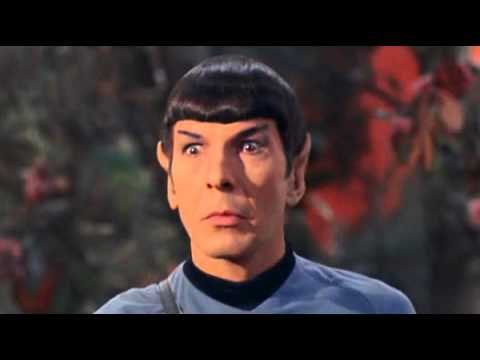

In [71]:
for Id in missing.full_imdbid:
    movie = omdb.imdbid(Id, tomatoes=False, timeout=5)
    movie_set  = pd.DataFrame(movie, columns=movie.keys())
    df = pd.concat([df, movie_set], axis =0, sort=False)
    
    
#play lenord Nemoy saying "beep" for 4 hours
from IPython.display import YouTubeVideo
YouTubeVideo("BE9b3IdTCiY",autoplay=True)

In [72]:
df

,title,year,rated,released,runtime,genre,director,writer,actors,plot,...,type,dvd,box_office,production,website,response,total_seasons,season,episode,series_id
0,Toy Story,1995,G,22 Nov 1995,81 min,"Animation, Adventure, Comedy, Family, Fantasy",John Lasseter,"John Lasseter (original story by), Pete Docter...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney",A cowboy doll is profoundly threatened and jea...,...,movie,20 Mar 2001,N/A,Buena Vista,http://www.disney.com/ToyStory,True,NaN,NaN,NaN,NaN
0,Jumanji,1995,PG,15 Dec 1995,104 min,"Adventure, Comedy, Family, Fantasy",Joe Johnston,"Jonathan Hensleigh (screenplay by), Greg Taylo...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",When two kids find and play a magical board ga...,...,movie,25 Jan 2000,N/A,Sony Pictures Home Entertainment,N/A,True,NaN,NaN,NaN,NaN
0,Grumpier Old Men,1995,PG-13,22 Dec 1995,101 min,"Comedy, Romance",Howard Deutch,"Mark Steven Johnson (characters), Mark Steven ...","Walter Matthau, Jack Lemmon, Sophia Loren, Ann...",John and Max resolve to save their beloved bai...,...,movie,18 Nov 1997,N/A,Warner Home Video,N/A,True,NaN,NaN,NaN,NaN
0,Waiting to Exhale,1995,R,22 Dec 1995,124 min,"Comedy, Drama, Romance",Forest Whitaker,"Terry McMillan (novel), Terry McMillan (screen...","Whitney Houston, Angela Bassett, Loretta Devin...","Based on Terry McMillan's novel, this film fol...",...,movie,06 Mar 2001,N/A,Twentieth Century Fox Home Entertainment,N/A,True,NaN,NaN,NaN,NaN
0,Father of the Bride Part II,1995,PG,08 Dec 1995,106 min,"Comedy, Family, Romance",Charles Shyer,"Albert Hackett (screenplay ""Father's Little Di...","Steve Martin, Diane Keaton, Martin Short, Kimb...",George Banks must deal not only with the pregn...,...,movie,09 May 2000,N/A,Disney,N/A,True,NaN,NaN,NaN,NaN
0,Heat,1995,R,15 Dec 1995,170 min,"Crime, Drama, Thriller",Michael Mann,Michael Mann,"Al Pacino, Robert De Niro, Val Kilmer, Jon Voight",A group of professional bank robbers start to ...,...,movie,27 Jul 1999,N/A,Warner Bros.,https://www.warnerbros.com/heat,True,NaN,NaN,NaN,NaN
0,Sabrina,1995,PG,15 Dec 1995,127 min,"Comedy, Drama, Romance",Sydney Pollack,"Samuel A. Taylor (play), Billy Wilder (earlier...","Harrison Ford, Julia Ormond, Greg Kinnear, Nan...",An ugly duckling having undergone a remarkable...,...,movie,15 Jan 2002,N/A,Paramount,N/A,True,NaN,NaN,NaN,NaN
0,Tom and Huck,1995,PG,22 Dec 1995,97 min,"Adventure, Comedy, Drama, Family, Romance, Wes...",Peter Hewitt,"Mark Twain (novel), Stephen Sommers (screenpla...","Jonathan Taylor Thomas, Brad Renfro, Eric Schw...",Two best friends witness a murder and embark o...,...,movie,06 May 2003,N/A,Buena Vista,N/A,True,NaN,NaN,NaN,NaN
0,Sudden Death,1995,R,22 Dec 1995,111 min,"Action, Crime, Thriller",Peter Hyams,"Karen Elise Baldwin (story), Gene Quintano (sc...","Jean-Claude Van Damme, Powers Boothe, Raymond ...",A former fireman takes on a group of terrorist...,...,movie,01 Nov 1998,N/A,MCA Universal Home Video,N/A,True,NaN,NaN,NaN,NaN
0,GoldenEye,1995,PG-13,17 Nov 1995,130 min,"Action, Adventure, Thriller",Martin Campbell,"Ian Fleming (characters), Michael France (stor...","Pierce Brosnan, Sean Bean, Izabella Scorupco, ...",James Bond teams up with the lone survivor of ...,...,movie,19 Oct 1999,N/A,MGM/UA,N/A,True,NaN,NaN,NaN,NaN


In [73]:
df.shape

(44525, 29)

In [74]:
df = df.drop_duplicates(subset='title')

In [77]:
df

,title,year,rated,released,runtime,genre,director,writer,actors,plot,...,type,dvd,box_office,production,website,response,total_seasons,season,episode,series_id
0,Toy Story,1995,G,22 Nov 1995,81 min,"Animation, Adventure, Comedy, Family, Fantasy",John Lasseter,"John Lasseter (original story by), Pete Docter...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney",A cowboy doll is profoundly threatened and jea...,...,movie,20 Mar 2001,N/A,Buena Vista,http://www.disney.com/ToyStory,True,NaN,NaN,NaN,NaN
0,Jumanji,1995,PG,15 Dec 1995,104 min,"Adventure, Comedy, Family, Fantasy",Joe Johnston,"Jonathan Hensleigh (screenplay by), Greg Taylo...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",When two kids find and play a magical board ga...,...,movie,25 Jan 2000,N/A,Sony Pictures Home Entertainment,N/A,True,NaN,NaN,NaN,NaN
0,Grumpier Old Men,1995,PG-13,22 Dec 1995,101 min,"Comedy, Romance",Howard Deutch,"Mark Steven Johnson (characters), Mark Steven ...","Walter Matthau, Jack Lemmon, Sophia Loren, Ann...",John and Max resolve to save their beloved bai...,...,movie,18 Nov 1997,N/A,Warner Home Video,N/A,True,NaN,NaN,NaN,NaN
0,Waiting to Exhale,1995,R,22 Dec 1995,124 min,"Comedy, Drama, Romance",Forest Whitaker,"Terry McMillan (novel), Terry McMillan (screen...","Whitney Houston, Angela Bassett, Loretta Devin...","Based on Terry McMillan's novel, this film fol...",...,movie,06 Mar 2001,N/A,Twentieth Century Fox Home Entertainment,N/A,True,NaN,NaN,NaN,NaN
0,Father of the Bride Part II,1995,PG,08 Dec 1995,106 min,"Comedy, Family, Romance",Charles Shyer,"Albert Hackett (screenplay ""Father's Little Di...","Steve Martin, Diane Keaton, Martin Short, Kimb...",George Banks must deal not only with the pregn...,...,movie,09 May 2000,N/A,Disney,N/A,True,NaN,NaN,NaN,NaN
0,Heat,1995,R,15 Dec 1995,170 min,"Crime, Drama, Thriller",Michael Mann,Michael Mann,"Al Pacino, Robert De Niro, Val Kilmer, Jon Voight",A group of professional bank robbers start to ...,...,movie,27 Jul 1999,N/A,Warner Bros.,https://www.warnerbros.com/heat,True,NaN,NaN,NaN,NaN
0,Sabrina,1995,PG,15 Dec 1995,127 min,"Comedy, Drama, Romance",Sydney Pollack,"Samuel A. Taylor (play), Billy Wilder (earlier...","Harrison Ford, Julia Ormond, Greg Kinnear, Nan...",An ugly duckling having undergone a remarkable...,...,movie,15 Jan 2002,N/A,Paramount,N/A,True,NaN,NaN,NaN,NaN
0,Tom and Huck,1995,PG,22 Dec 1995,97 min,"Adventure, Comedy, Drama, Family, Romance, Wes...",Peter Hewitt,"Mark Twain (novel), Stephen Sommers (screenpla...","Jonathan Taylor Thomas, Brad Renfro, Eric Schw...",Two best friends witness a murder and embark o...,...,movie,06 May 2003,N/A,Buena Vista,N/A,True,NaN,NaN,NaN,NaN
0,Sudden Death,1995,R,22 Dec 1995,111 min,"Action, Crime, Thriller",Peter Hyams,"Karen Elise Baldwin (story), Gene Quintano (sc...","Jean-Claude Van Damme, Powers Boothe, Raymond ...",A former fireman takes on a group of terrorist...,...,movie,01 Nov 1998,N/A,MCA Universal Home Video,N/A,True,NaN,NaN,NaN,NaN
0,GoldenEye,1995,PG-13,17 Nov 1995,130 min,"Action, Adventure, Thriller",Martin Campbell,"Ian Fleming (characters), Michael France (stor...","Pierce Brosnan, Sean Bean, Izabella Scorupco, ...",James Bond teams up with the lone survivor of ...,...,movie,19 Oct 1999,N/A,MGM/UA,N/A,True,NaN,NaN,NaN,NaN


In [78]:
df.to_csv('scrapedfromimdb.csv')

In [80]:
df.shape

(25634, 29)

In [79]:
df.columns

Index(['title', 'year', 'rated', 'released', 'runtime', 'genre', 'director',
       'writer', 'actors', 'plot', 'language', 'country', 'awards', 'poster',
       'ratings', 'metascore', 'imdb_rating', 'imdb_votes', 'imdb_id', 'type',
       'dvd', 'box_office', 'production', 'website', 'response',
       'total_seasons', 'season', 'episode', 'series_id'],
      dtype='object')

In [ ]:
for Id in movies.imdbId:
    Id = str(Id)
    if len(Id) == 6:
        movies['full_imdbid'] = movies['imdbId'].apply(lambda x: 'tt0' + str(x))
    elif len(Id) == 5:
        movies['full_imdbid'] = movies['imdbId'].apply(lambda x: 'tt00' + str(x))